In [1]:
train_data_file_path="E:\\eye_state_project\\eegeyestatus\\train_data_files\\"
verify_data_file_path="E:\\eye_state_project\\eegeyestatus\\verify_data_files\\"

In [2]:
from generate_data0824 import generate_data_list
import pandas as pd

train_data_list=generate_data_list(train_data_file_path)
generate_traindata_df=pd.DataFrame(train_data_list)

In [3]:
train_X=generate_traindata_df.drop([4],axis=1)

train_y=generate_traindata_df[4].values

In [4]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

norm = Normalizer()
X = norm.fit_transform(train_X.T)
#train_X,test_X,train_y,test_y=train_test_split(X.T, y, test_size=0.25,random_state=0,shuffle=False, stratify=None)
#train_X,test_X,train_y,test_y=train_test_split(X.T, y, test_size=0.25,random_state=0,shuffle=True)
#train_X,test_X,train_y,test_y=train_test_split(X.T, y, test_size=0.25,random_state=0)

In [5]:
import numpy as np
import pandas as pd

#col = ['max_value',	'min_value', 'kurtosis', '0.1_0.3_max',  '0.1_0.3_min', 
       #'4_7_min', '11_16_min', '15_30_min', 'Shannon_entropy']
col = ['max_value','kurtosis', '0.1_0.3_max','0.1_0.3_min']

train_data = pd.DataFrame((np.vstack((train_X.T,train_y.T))).T, columns=col+['class'])

In [6]:
from autogluon.tabular import TabularDataset, TabularPredictor
predictor = TabularPredictor(label='class').fit(train_data=train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20220825_061628\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20220825_061628\"
AutoGluon Version:  0.5.1
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    4506
Train Data Columns: 4
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [3.0, 2.0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 3.0, class 0 = 2.0
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (3.0) vs negative (2.0) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in P

[1000]	valid_set's binary_error: 0.276


	0.74	 = Validation score   (accuracy)
	1.1s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...
	0.788	 = Validation score   (accuracy)
	0.23s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.742	 = Validation score   (accuracy)
	0.43s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.74	 = Validation score   (accuracy)
	0.4s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
D:\Users\John\anaconda3\envs\ML_learning\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
	0.784	 = Validation score   (accuracy)
	1.37s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.742	 = Validation score   (accuracy)
	0.37s	 = Training   runtime
	0.04s

In [7]:
test_data_list=generate_data_list(verify_data_file_path)
generate_testdata_df=pd.DataFrame(test_data_list)

test_X=generate_testdata_df.drop([4],axis=1)

test_y=generate_testdata_df[4].values

In [8]:
test_data = pd.DataFrame((np.vstack((test_X.T,test_y.T))).T, columns=col+['class'])

predictor=TabularPredictor.load("AutogluonModels/ag-20220825_061628/")
predictions = predictor.predict(test_data, model= 'LightGBM' )

In [9]:
predict_result_array = np.array(predictions)
real_result_array = np.array(test_y)

In [9]:
#real_result_array

预测准确率： 66.29732225300093


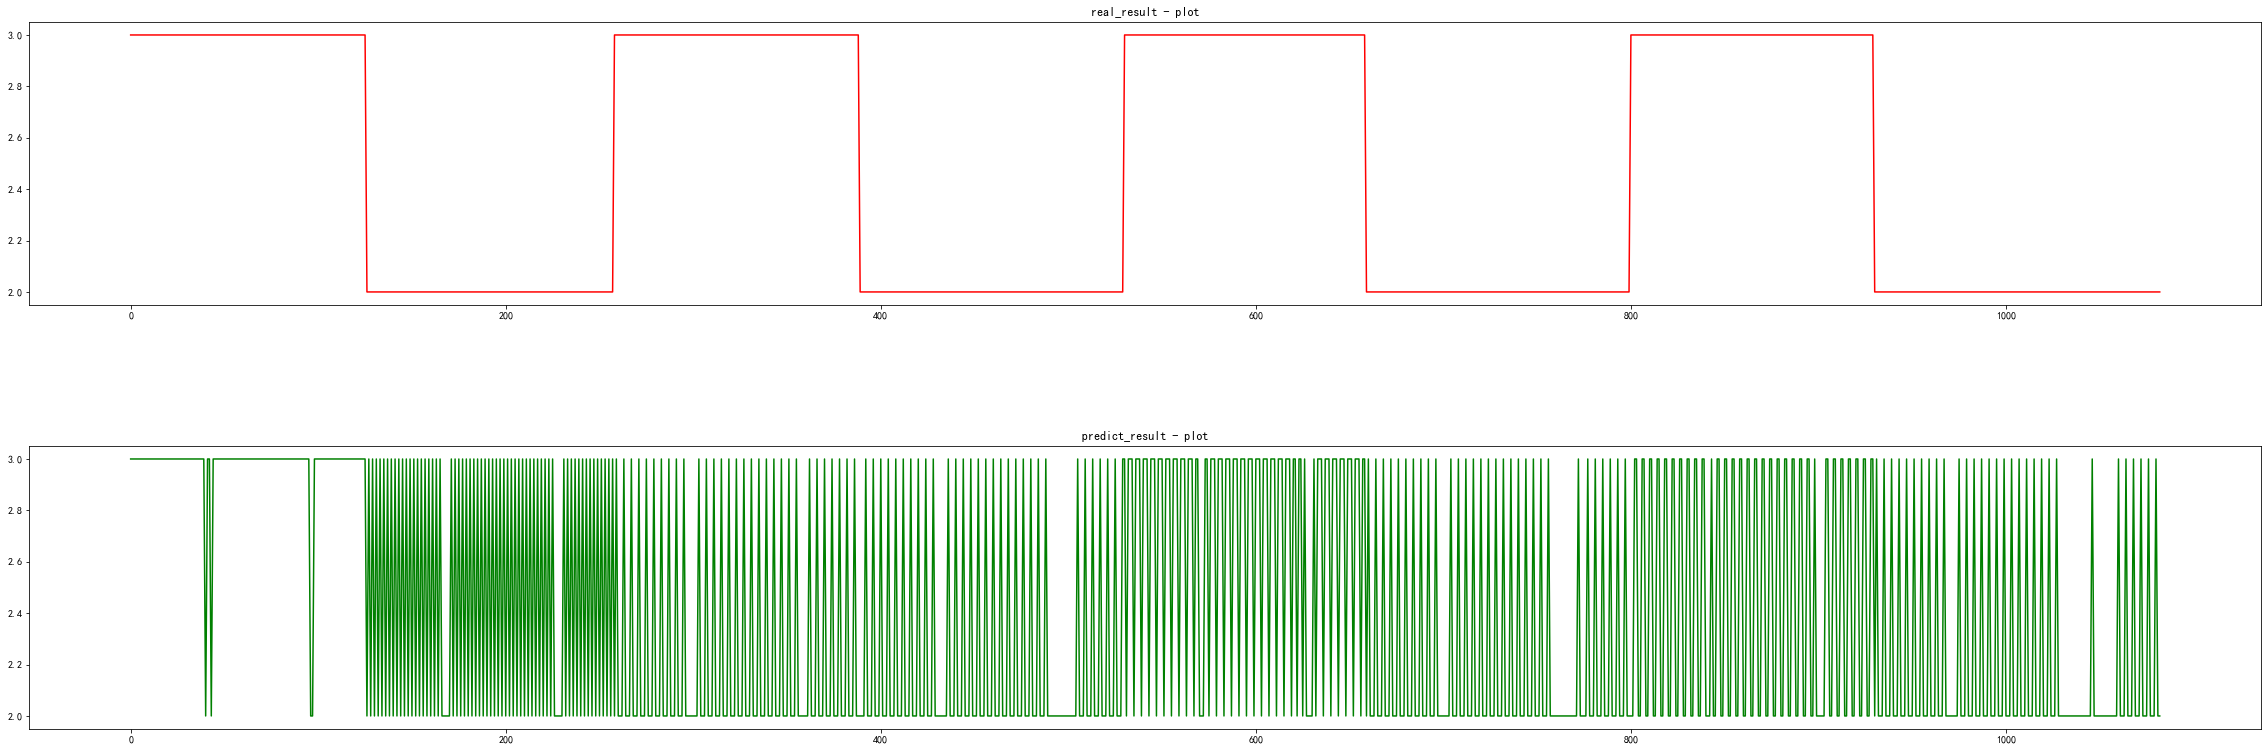

In [10]:
from generate_data import multi_column_plot

correct_count=0
for i,j in zip(real_result_array,predict_result_array):
    if int(i)==int(j):
        correct_count+=1
print("预测准确率：",(correct_count/real_result_array.size)*100)

mat_list=[
    [{"title":"real_result","data":real_result_array,"color":"red"}],
    [{"title":"predict_result","data":predict_result_array,"color":"green"}]
]
multi_column_plot(mat_list,"plot")